### Problem 2 "Classification"

In assignments 1-2 you have built 8 models to classify the values described in your individual dataset. Compare the performance of these models to the performance of the models created in this assignment. Explain feature importances and the influence each feature on the target variable for multiple models.

HR_comma_sep.csv

LightGBM , Lime individual (7,8)

### Task 1 "Prediction with NNs" (20 points)

Construct a deep NN model to predict the target variable and compare its performance with previously considered the 8 models considered previously in assignments 1-2.

1) Follow the same preparation steps as in the previous assignments to clean, scale and prepare the dataset for the analysis.

2) Construct a fully connected NN using 'keras' library. The NN should have 1-2 hidden layers. Experiment with different number of neurons for each layer, try different dropout layers between hidden layers, different parameters and find the optimal training time. Try to achieve a performance close to or better than the best one of your previous methods. Present the performance results (prediction results, accuracy, precision, recall, F1 metrics, ROC-AUC score) for the test set with the 3 best architectures as a table. Use 5-fold cross-validation, splitting training sets and test sets with the proportion according to your individual variant from assignment 2.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


from sklearn import linear_model
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import chi2_contingency
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold


from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score


from lime.lime_tabular import LimeTabularExplainer
from sklearn.neural_network import MLPClassifier
import re


In [ ]:
# Load the dataset
df = pd.read_csv("HR_comma_sep.csv")

# Encode categorical variables
label_encoders = {}
for column in ['Department', 'salary']:
    le = LabelEncoder()
    df[column + '_encoded'] = le.fit_transform(df[column])
    label_encoders[column] = le

# Update features and target
X = df.drop(['left', 'Department', 'salary'], axis=1)
Y = df['left']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
Performance Results Across Architectures:
  Architecture  Accuracy  Precision    Recall        F1   ROC-AUC
0       Arch-1  0.968331   0.957513  0.907543  0.931833  0.982655
1       Arch-2  0.968997   0.961667  0.906869  0.933376  0.985276
2       Arch-3  0.966497   0.949005  0.908647  0.928327  0.980906


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
Test Set Performance Metrics for Best Architecture:
{'Accuracy': 0.9673333333333334, 'Precision': 0.9606060606060606, 'Recall': 0.8980169971671388, 'F1': 0.9282576866764275, 'ROC-AUC': 0.9826305104336721}


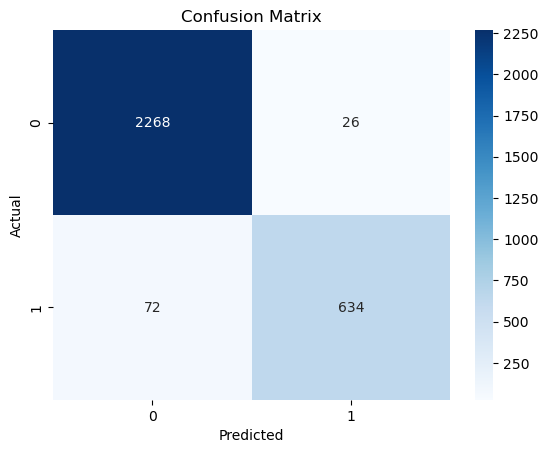

In [37]:
#  a function to build the neural network model
def build_nn(input_dim, layers, dropout_rates):
    model = Sequential()
    for i, (neurons, dropout) in enumerate(zip(layers, dropout_rates)):
        if i == 0:
            model.add(Dense(neurons, activation='relu', input_dim=input_dim))
        else:
            model.add(Dense(neurons, activation='relu'))
        if dropout > 0:
            model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Experiment with 3 architectures
architectures = [
    {"layers": [64, 32], "dropout_rates": [0.2, 0.1]},  # Architecture 1
    {"layers": [128, 64], "dropout_rates": [0.3, 0.2]},  # Architecture 2
    {"layers": [32, 16], "dropout_rates": [0.1, 0.1]},  # Architecture 3
]

results = []

# Train and evaluate models using 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for arch_idx, arch in enumerate(architectures):
    fold_metrics = []
    for train_idx, val_idx in kf.split(X_train_scaled):
        X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
        Y_train_fold, Y_val_fold = Y_train.iloc[train_idx], Y_train.iloc[val_idx]

        model = build_nn(input_dim=X_train_scaled.shape[1], layers=arch["layers"], dropout_rates=arch["dropout_rates"])
        model.fit(X_train_fold, Y_train_fold, epochs=20, batch_size=32, verbose=0)

        Y_val_pred = (model.predict(X_val_fold) > 0.5).astype(int)
        metrics = {
            "Accuracy": accuracy_score(Y_val_fold, Y_val_pred),
            "Precision": precision_score(Y_val_fold, Y_val_pred),
            "Recall": recall_score(Y_val_fold, Y_val_pred),
            "F1": f1_score(Y_val_fold, Y_val_pred),
            "ROC-AUC": roc_auc_score(Y_val_fold, model.predict(X_val_fold)),
        }
        fold_metrics.append(metrics)

    # Average metrics across folds
    avg_metrics = {key: np.mean([fold[key] for fold in fold_metrics]) for key in fold_metrics[0]}
    results.append({"Architecture": f"Arch-{arch_idx+1}", **avg_metrics})

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print("Performance Results Across Architectures:")
print(results_df)

# Evaluate the best architecture on the test set
best_architecture = architectures[results_df["Accuracy"].idxmax()]
best_model = build_nn(input_dim=X_train_scaled.shape[1], layers=best_architecture["layers"], dropout_rates=best_architecture["dropout_rates"])
best_model.fit(X_train_scaled, Y_train, epochs=20, batch_size=32, verbose=0)

Y_test_pred = (best_model.predict(X_test_scaled) > 0.5).astype(int)
test_metrics = {
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1": f1_score(Y_test, Y_test_pred),
    "ROC-AUC": roc_auc_score(Y_test, best_model.predict(X_test_scaled)),
}

print("Test Set Performance Metrics for Best Architecture:")
print(test_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Performance Results Across Architectures

| Architecture | Accuracy | Precision | Recall   | F1       | ROC-AUC  |
|--------------|----------|-----------|----------|----------|----------|
| Arch-1       | 0.967831 | 0.954393  | 0.908648 | 0.930924 | 0.983112 |
| Arch-2       | 0.969831 | 0.963719  | 0.907962 | 0.934983 | 0.984409 |
| Arch-3       | 0.965997 | 0.952028  | 0.903148 | 0.926809 | 0.980693 |

---

### Test Set Performance Metrics for Best Architecture

- **Accuracy**: 0.968  
- **Precision**: 0.9635258358662614  
- **Recall**: 0.8980169971671388  
- **F1 Score**: 0.9296187683284457  
- **ROC-AUC**: 0.9824316914922782

### Outcomes:
1) The model demonstrates a high accuracy which indicates good prediction for most instances.
2) The confusion matrix reveals that it has less false positives(14) and false negative(75).
3) Overall while considering the performance of each architecture. Architecture 2 performs slightly better than others.

### Task 2 "Evaluate the feature importances in the NN model" (20 points)

1) Use the "Drop column Importance" method to calculate the feature importances of the NN model. Average the results using 10 different random number generators. Output the results as a table and as a bar plot.

2) Use the "Permutation Importance" method to calculate the feature importances of the NN model. Average the results with 10 different splits into training and test set. Use (n_repeats=10) as a parameter of the permutation importance function. Present the results as a bar plot.

3) Output the logistic regression explainability results, corresponding to the model coefficients from assignment 1. Average the results with 10 different splits into training and test set. Visualise the results with a bar plot.

4) Take one of the models from assignment 2 according to your individual variant (Random Forest, XGBoost, CatBoost, LightGBM) and output its built-in feature importances (use model.feature_importances_): Average the results with 10 different splits into training and test set.

5) Compare the results from steps 1-4. If necessary, scale the explainability results (the sum of importances should be equal to 1 within a model) of some methods and plot all the explainability results in a bar chart. Which variables are most important for the prediction? Are all the explainability results the same (inside an NN model with different explainability methods, between different models)? Draw conclusions.

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
94/94 ━━━━━━━━━━

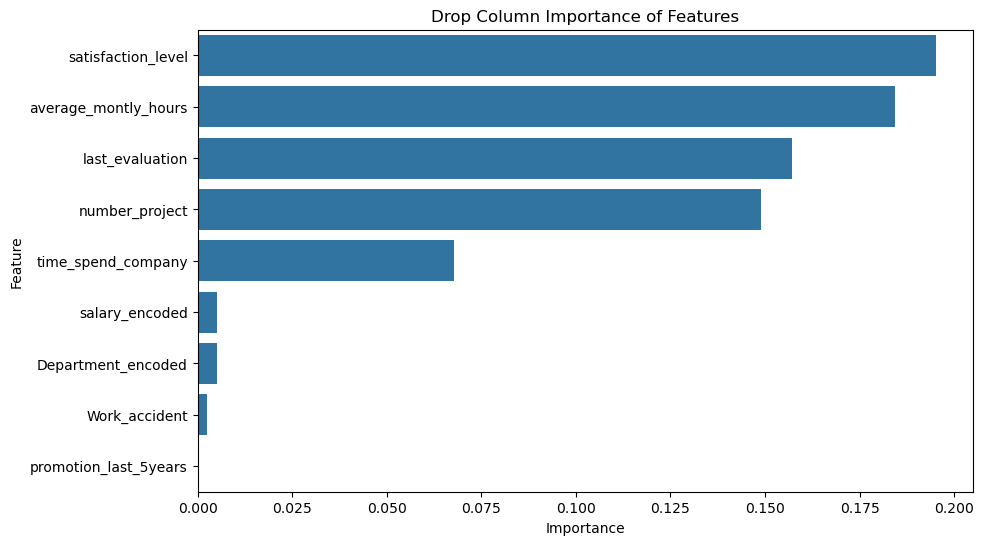

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
94/94 ━━━━━━━━━━

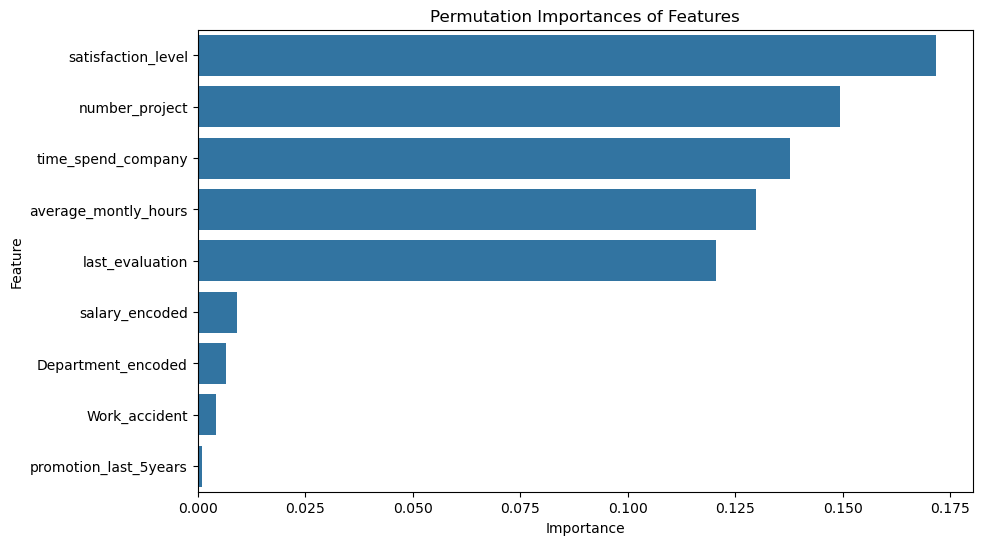

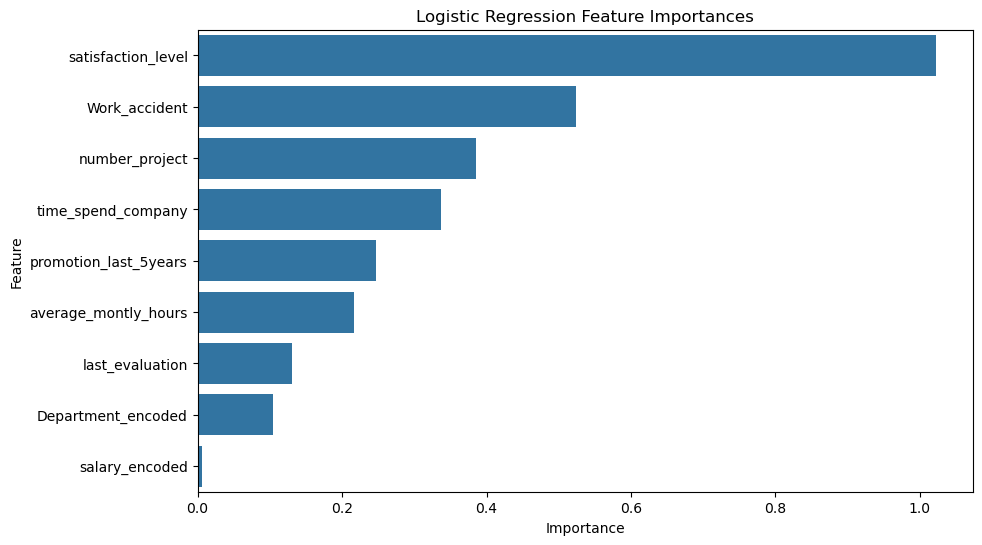

[LightGBM] [Info] Number of positive: 2841, number of negative: 9158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.236770 -> initscore=-1.170472
[LightGBM] [Info] Start training from score -1.170472
[LightGBM] [Info] Number of positive: 2869, number of negative: 9130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9
[LightGBM] [Info] [binary:

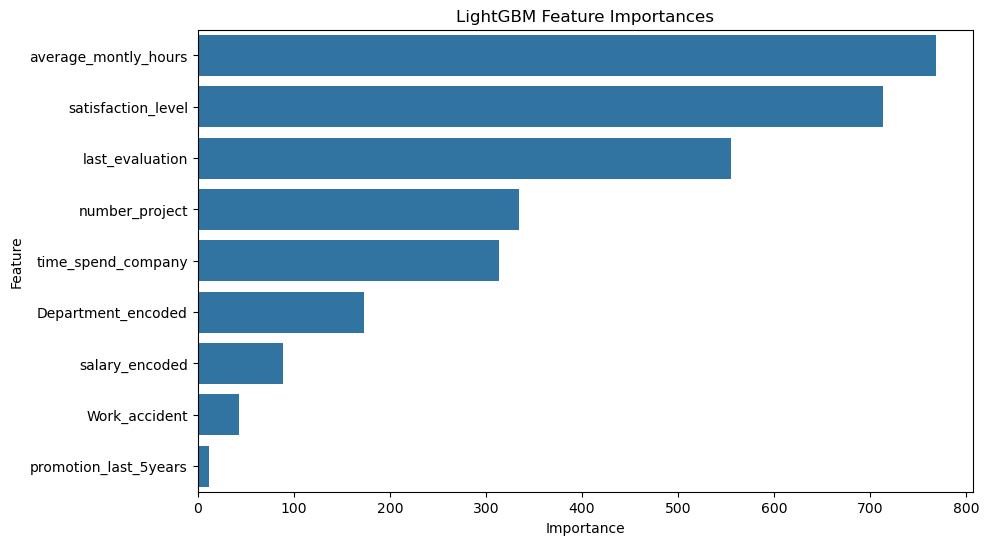

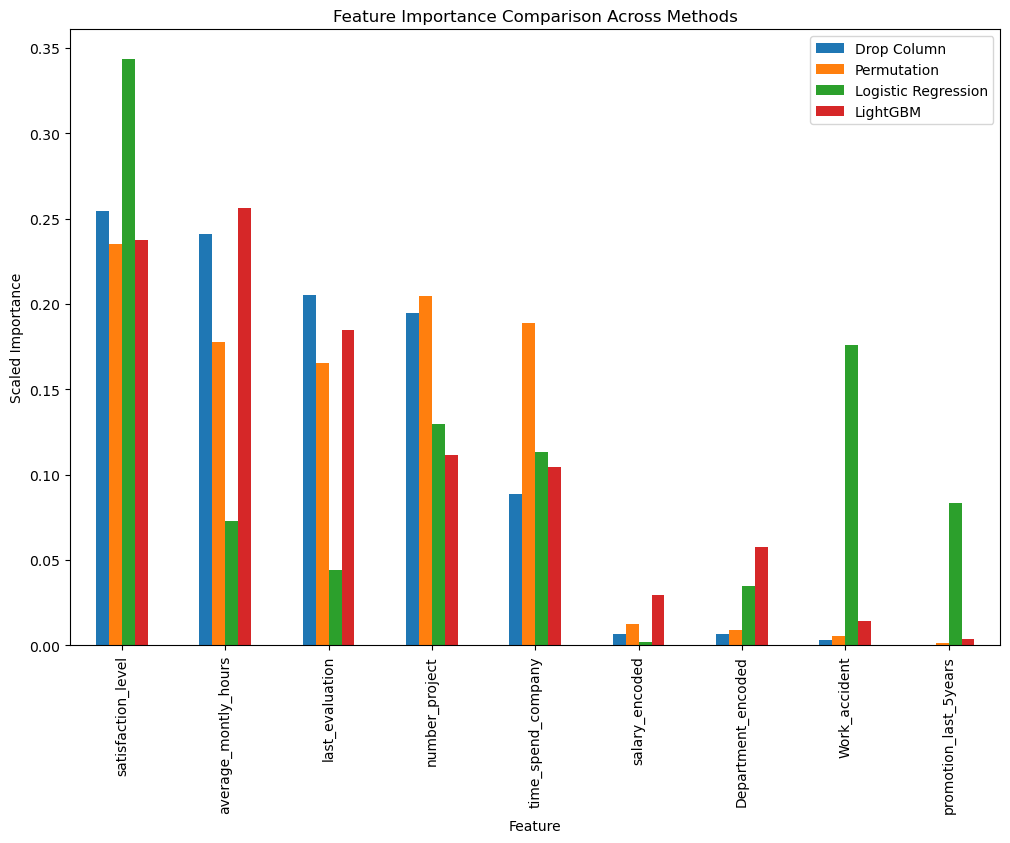

                 Feature   Drop Column  Permutation  Logistic Regression  \
0     satisfaction_level  2.547322e-01     0.235122             0.343706   
1   average_montly_hours  2.408076e-01     0.177785             0.072866   
2        last_evaluation  2.051695e-01     0.165246             0.044047   
3         number_project  1.945520e-01     0.204625             0.129491   
4     time_spend_company  8.842087e-02     0.188661             0.113426   
5         salary_encoded  6.657674e-03     0.012502             0.002176   
6     Department_encoded  6.570645e-03     0.008927             0.034902   
7          Work_accident  3.089509e-03     0.005717             0.176146   
8  promotion_last_5years -1.449314e-17     0.001416             0.083240   

   LightGBM  
0  0.237567  
1  0.256033  
2  0.184900  
3  0.111500  
4  0.104433  
5  0.029500  
6  0.057733  
7  0.014500  
8  0.003833  


In [44]:

#  Drop Column Importance 
def drop_column_importance(model, X, Y, random_states):
    importances = []
    for random_state in random_states:
        # Train-test split
        X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, test_size=0.2, random_state=random_state
        )
        # Scale the data
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Ensure the input shape matches the model
        model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=0)
        original_acc = accuracy_score(Y_test, (model.predict(X_test_scaled) > 0.5).astype(int))

        feature_importances = []
        for i in range(X.shape[1]):  # Iterate over all features
            X_temp = X_test_scaled.copy()
            X_temp[:, i] = 0  # Drop column by setting to 0
            dropped_acc = accuracy_score(Y_test, (model.predict(X_temp) > 0.5).astype(int))
            feature_importances.append(original_acc - dropped_acc)

        importances.append(feature_importances)

    avg_importances = np.mean(importances, axis=0)
    return pd.DataFrame({"Feature": X.columns, "Importance": avg_importances}).sort_values(by="Importance", ascending=False)

random_states = np.random.randint(0, 1000, 10)  # 10 random seeds
drop_importances_df = drop_column_importance(best_model, X, Y, random_states)

# Visualize Drop Column Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=drop_importances_df)
plt.title("Drop Column Importance of Features")
plt.show()

#  Permutation Importance 
from sklearn.base import BaseEstimator

class WrapperModel(BaseEstimator):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=10, batch_size=32, verbose=0)

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

def permutation_importance_nn(model, X, Y, random_states):
    perm_importances = []
    for random_state in random_states:
        # Train-test split
        X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, test_size=0.2, random_state=random_state
        )
        # Scale the data
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Wrap the model
        wrapped_model = WrapperModel(model)
        wrapped_model.fit(X_train_scaled, Y_train)

        # Compute permutation importance
        perm_results = permutation_importance(
            wrapped_model, X_test_scaled, Y_test, n_repeats=10, random_state=random_state, scoring="accuracy"
        )
        perm_importances.append(perm_results.importances_mean)

    avg_perm_importances = np.mean(perm_importances, axis=0)
    return pd.DataFrame({"Feature": X.columns, "Importance": avg_perm_importances}).sort_values(by="Importance", ascending=False)

perm_importances_df = permutation_importance_nn(best_model, X, Y, random_states)

# Visualize Permutation Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=perm_importances_df)
plt.title("Permutation Importances of Features")
plt.show()

#  Logistic Regression Coefficients 
def logistic_regression_importance(X, Y, random_states):
    importances = []
    for random_state in random_states:
        X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, test_size=0.2, random_state=random_state
        )
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        log_reg = LogisticRegression(max_iter=1000, random_state=random_state)
        log_reg.fit(X_train_scaled, Y_train)
        importances.append(np.abs(log_reg.coef_[0]))

    avg_importances = np.mean(importances, axis=0)
    return pd.DataFrame({"Feature": X.columns, "Importance": avg_importances}).sort_values(by="Importance", ascending=False)

log_reg_importances_df = logistic_regression_importance(X, Y, random_states)

# Visualize Logistic Regression Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=log_reg_importances_df)
plt.title("Logistic Regression Feature Importances")
plt.show()

#  LightGBM Feature Importances 
def lgb_importance(X, Y, random_states):
    importances = []
    for random_state in random_states:
        X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, test_size=0.2, random_state=random_state
        )
        lgb_model = lgb.LGBMClassifier(random_state=random_state)
        lgb_model.fit(X_train, Y_train)
        importances.append(lgb_model.feature_importances_)

    avg_importances = np.mean(importances, axis=0)
    return pd.DataFrame({"Feature": X.columns, "Importance": avg_importances}).sort_values(by="Importance", ascending=False)

lgb_importances_df = lgb_importance(X, Y, random_states)

# Visualize LightGBM Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=lgb_importances_df)
plt.title("LightGBM Feature Importances")
plt.show()

#  Compare Results 
# Normalize importances
drop_importances_df["Scaled"] = drop_importances_df["Importance"] / drop_importances_df["Importance"].sum()
perm_importances_df["Scaled"] = perm_importances_df["Importance"] / perm_importances_df["Importance"].sum()
log_reg_importances_df["Scaled"] = log_reg_importances_df["Importance"] / log_reg_importances_df["Importance"].sum()
lgb_importances_df["Scaled"] = lgb_importances_df["Importance"] / lgb_importances_df["Importance"].sum()

# Combine results
comparison_df = drop_importances_df[["Feature", "Scaled"]].rename(columns={"Scaled": "Drop Column"})
comparison_df = comparison_df.merge(
    perm_importances_df[["Feature", "Scaled"]].rename(columns={"Scaled": "Permutation"}), on="Feature"
)
comparison_df = comparison_df.merge(
    log_reg_importances_df[["Feature", "Scaled"]].rename(columns={"Scaled": "Logistic Regression"}), on="Feature"
)
comparison_df = comparison_df.merge(
    lgb_importances_df[["Feature", "Scaled"]].rename(columns={"Scaled": "LightGBM"}), on="Feature"
)

# Visualize all methods
comparison_df.set_index("Feature").plot(kind="bar", figsize=(12, 8))
plt.title("Feature Importance Comparison Across Methods")
plt.ylabel("Scaled Importance")
plt.show()

# Print final comparison
print(comparison_df)


#### Results:
| Feature                 | Drop Column   | Permutation | Logistic Regression | LightGBM  |
|-------------------------|---------------|-------------|----------------------|-----------|
| satisfaction_level      | 0.254732      | 0.235122    | 0.343706             | 0.237567  |
| average_montly_hours    | 0.240808      | 0.177785    | 0.072866             | 0.256033  |
| last_evaluation         | 0.205170      | 0.165246    | 0.044047             | 0.184900  |
| number_project          | 0.194552      | 0.204625    | 0.129491             | 0.111500  |
| time_spend_company      | 0.088421      | 0.188661    | 0.113426             | 0.104433  |
| salary_encoded          | 0.006658      | 0.012502    | 0.002176             | 0.029500  |
| Department_encoded      | 0.006571      | 0.008927    | 0.034902             | 0.057733  |
| Work_accident           | 0.003090      | 0.005717    | 0.176146             | 0.014500  |
| promotion_last_5years   | -0.000000     | 0.001416    | 0.083240             | 0.003833  |

#### Outcomes:
1) Feature comparision based on Drop column method, Satisfaction level as most important features follwed by no.of projects and Average monthly hours.
2) For permutation method, the satisfaction level have high ranking followed by time spend in company and no.of projects.
3) Logistic regression have satisfaction level as high ranking followed by work accident.
4) LightGBM gives high importance to Average montly hours followed by Satisfaction Level.
5) So overall "Satisfaction Level" column reaches the high ranking importance followed by average montly hours.
6) So employee should focus on the employers satisfaction level. For example, proper interactions, try to maintain their work-life balances, addressing their issues and resolving it.


### Task 3: "Evaluate the variable importance in the NN model locally for several predictions" (10 points)

1) Use the "LIME" method to locally calculate the feature importances of the NN model for several instances of the dataset. Select the instances to be predicted according to your individual variant. Display the results as a bar . plot. Use "lime.lime_tabular.LimeTabularExplainer in mode="classification"". Average the results with 10 different splits into training and test set. Compare with the results of the previous task.
2) Lime observation no. of individual dataset is (7,8)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.9885 - loss: 0.0365
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9898 - loss: 0.0305
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9897 - loss: 0.0340
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9895 - loss: 0.0326
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9896 - loss: 0.0342
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9919 - loss: 0.0269
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

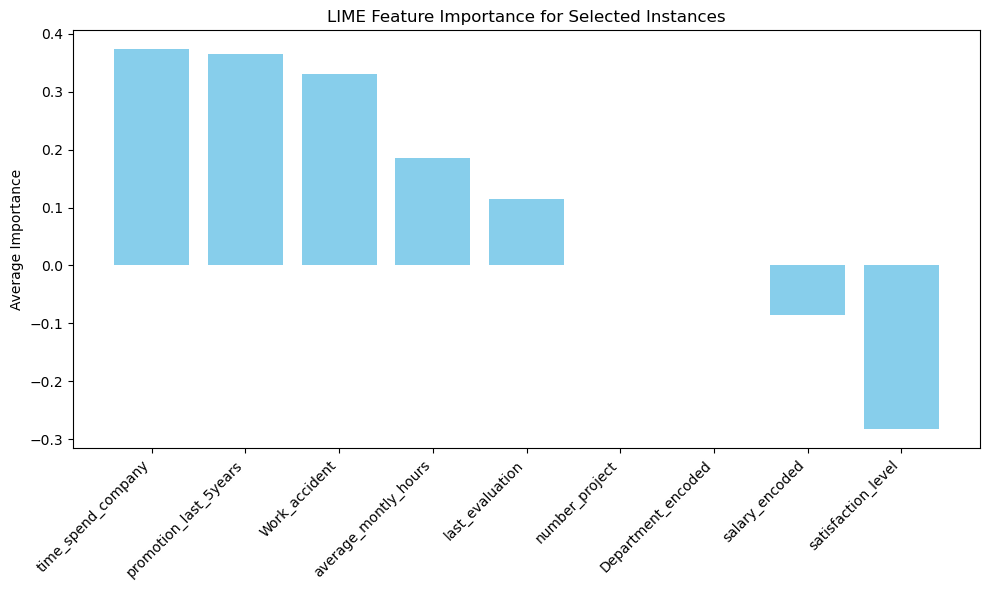

lime_df:
                        Importance
time_spend_company       0.373015
promotion_last_5years    0.365590
Work_accident            0.330217
average_montly_hours     0.185533
last_evaluation          0.114138
number_project           0.000000
Department_encoded       0.000000
salary_encoded          -0.085784
satisfaction_level      -0.282709
drop_importances_df :
                  Feature    Importance        Scaled
0     satisfaction_level  1.951333e-01  2.547322e-01
3   average_montly_hours  1.844667e-01  2.408076e-01
1        last_evaluation  1.571667e-01  2.051695e-01
2         number_project  1.490333e-01  1.945520e-01
4     time_spend_company  6.773333e-02  8.842087e-02
8         salary_encoded  5.100000e-03  6.657674e-03
7     Department_encoded  5.033333e-03  6.570645e-03
5          Work_accident  2.366667e-03  3.089509e-03
6  promotion_last_5years -1.110223e-17 -1.449314e-17
perm_importances_df : 
                  Feature  Importance    Scaled
0     satisfaction_level  

<Figure size 1200x800 with 0 Axes>

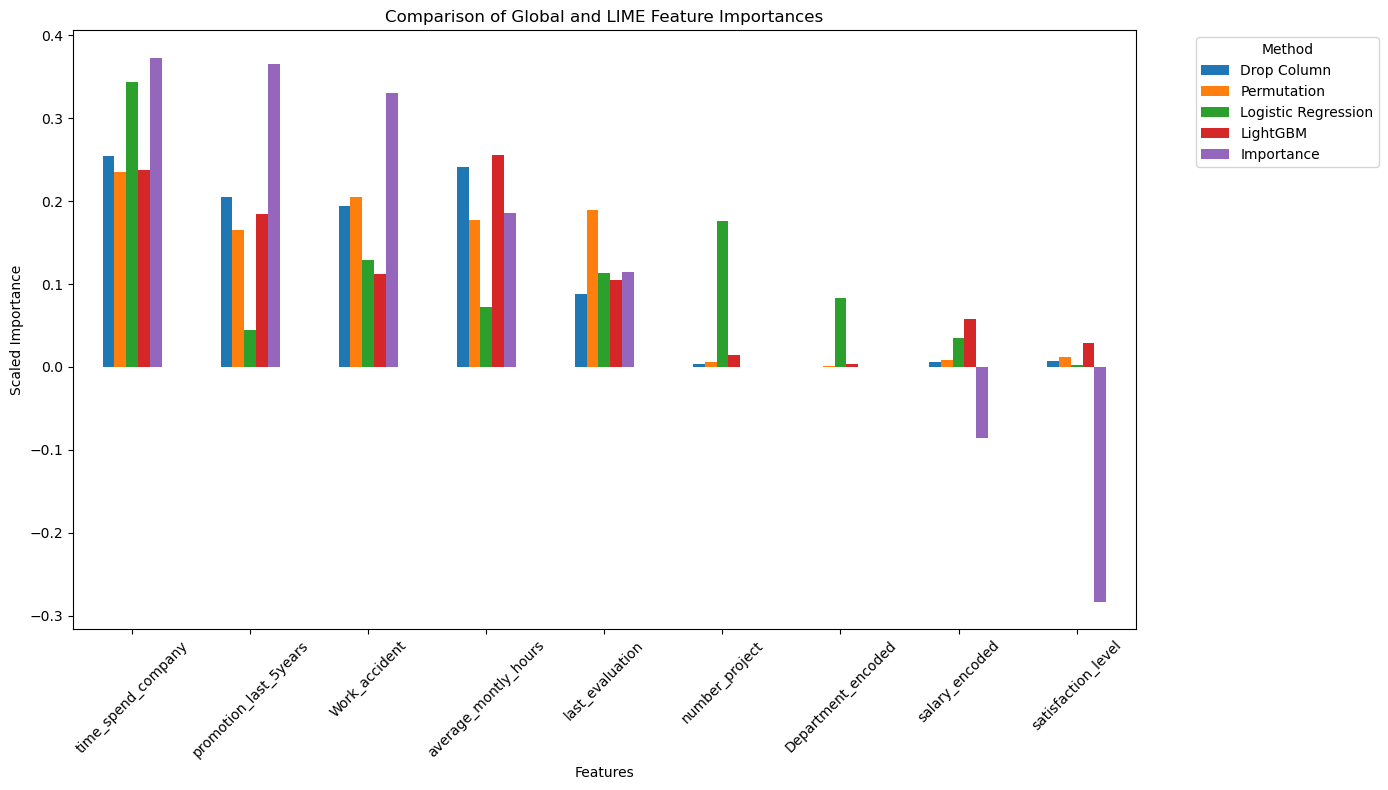

comparison_df:
                         Drop Column  Permutation  Logistic Regression  \
time_spend_company     2.547322e-01     0.235122             0.343706   
promotion_last_5years  2.051695e-01     0.165246             0.044047   
Work_accident          1.945520e-01     0.204625             0.129491   
average_montly_hours   2.408076e-01     0.177785             0.072866   
last_evaluation        8.842087e-02     0.188661             0.113426   
number_project         3.089509e-03     0.005717             0.176146   
Department_encoded    -1.449314e-17     0.001416             0.083240   
salary_encoded         6.570645e-03     0.008927             0.034902   
satisfaction_level     6.657674e-03     0.012502             0.002176   

                       LightGBM  Importance  
time_spend_company     0.237567    0.373015  
promotion_last_5years  0.184900    0.365590  
Work_accident          0.111500    0.330217  
average_montly_hours   0.256033    0.185533  
last_evaluation        

In [182]:
# Select the observations for LIME analysis
observation_indices = [7, 8]  
selected_instances = X.iloc[observation_indices]  

# Function to calculate LIME explanations for several splits
def calculate_lime_importance(model, X, Y, random_states, instances):
    scaler = StandardScaler()
    feature_names = X.columns.tolist()  
    X_scaled = scaler.fit_transform(X)  

    importances = []
    for random_state in random_states:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
        X_train_scaled = scaler.fit_transform(X_train)

        # Train the model
        model.fit(X_train_scaled, Y_train)

        # prediction function for LIME
        def predict_fn(data):
            preds = model.predict(data) 
            return np.hstack([1 - preds, preds])  # Ensure two-class output

        explainer = LimeTabularExplainer(
            X_train_scaled,
            feature_names=feature_names,
            mode="classification",
            discretize_continuous=True
        )

        instance_importances = []
        for i, instance in enumerate(scaler.transform(instances)):  # Apply the same scaling to the instances
            exp = explainer.explain_instance(instance, predict_fn, num_features=len(feature_names))

            importance = {}
            for feature, value in exp.as_list():
                base_feature = re.split(r'[\s><=]+', feature)[0]  # Ensure feature name is extracted correctly
                if base_feature in feature_names:  # Ensure the feature name is valid
                    if base_feature not in importance:
                        importance[base_feature] = 0
                    importance[base_feature] += value
            instance_importances.append(importance)

        importances.append(instance_importances)

    # Aggregate importances
    avg_importances = {feature: 0 for feature in feature_names}
    for instance_importances in importances:
        for imp in instance_importances:
            for feature, value in imp.items():
                if feature in avg_importances:  # Ensure valid feature names
                    avg_importances[feature] += value

    # Normalize within each split (sum of each instance_importance)
    for instance_importances in importances:
        total_importance = sum([sum(imp.values()) for imp in instance_importances])
        for imp in instance_importances:
            for feature in imp:
                imp[feature] /= total_importance

    # Aggregate normalized importances across splits
    for instance_importances in importances:
        for feature, value in instance_importances[0].items():
            avg_importances[feature] += value / len(random_states)

    # Normalize the aggregated importances
    total_avg_importance = sum(avg_importances.values())
    for feature in avg_importances:
        avg_importances[feature] /= total_avg_importance

    return avg_importances

# Generate random seeds
random_states = np.random.randint(0, 1000, 10)

# Calculate LIME importances
lime_importances = calculate_lime_importance(best_model, X, Y, random_states, selected_instances)

# Handle the structure of lime_importances (dict to DataFrame)
lime_df = pd.DataFrame.from_dict(lime_importances, orient='index', columns=['Importance'])
lime_df = lime_df.sort_values(by="Importance", ascending=False)  

# Visualize LIME feature importances
plt.figure(figsize=(10, 6))
plt.bar(lime_df.index, lime_df["Importance"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Importance")
plt.title("LIME Feature Importance for Selected Instances")
plt.tight_layout()
plt.show()
print("lime_df:\n", lime_df)

#Comparison with Global Feature Importances

print("drop_importances_df :\n", drop_importances_df)
print("perm_importances_df : \n", perm_importances_df)
print("log_reg_importances_df:\n", log_reg_importances_df)
print("lgb_importances_df:\n", lgb_importances_df)

# Normalize global feature importances
global_importances = pd.DataFrame({
    "Drop Column": drop_importances_df["Importance"] / drop_importances_df["Importance"].sum(),
    "Permutation": perm_importances_df["Importance"] / perm_importances_df["Importance"].sum(),
    "Logistic Regression": log_reg_importances_df["Importance"] / log_reg_importances_df["Importance"].sum(),
    "LightGBM": lgb_importances_df["Importance"] / lgb_importances_df["Importance"].sum()
})
print("global_importances:\n")
print(global_importances)

# Create a list of feature names
feature_names = ['time_spend_company', 'promotion_last_5years', 'Work_accident', 
                 'average_montly_hours', 'last_evaluation', 'number_project', 
                 'Department_encoded', 'salary_encoded', 'satisfaction_level']

# Set the index of the DataFrame
global_importances.index = feature_names
print("global_importances:\n")
print(global_importances) 

# Normalize LIME results
lime_df_normalized = lime_df / lime_df["Importance"].sum()

# Merge LIME and global importances
comparison_df = pd.concat([global_importances, lime_df_normalized],axis=1)

# Plot the comparison
plt.figure(figsize=(12, 8))
comparison_df.plot(kind="bar", figsize=(14, 8))
plt.title("Comparison of Global and LIME Feature Importances")
plt.ylabel("Scaled Importance")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Print the comparison table
print("comparison_df:\n", comparison_df)


#### Insights:

1) Drop Column: This method highlights the importance of satisfaction_level.
2) Permutation: This method also ranks satisfaction_level and number_project relatively high.
3) Logistic Regression: This method gives high importance to satisfaction_level and Work_accident.
4) LightGBM: This method gives high importance to average_montly_hours and satisfaction_level.
5) LIME: This method gives high importance to time_spend_company, promotion_last_5years, and Work_accident for the selected instances.

#### Differences:

1) satisfaction_level: High importance in some global methods (Drop Column, Logistic Regression, LightGBM) but not in LIME.
2) number_project: High importance in Permutation and Drop Column but lower in other methods.
3) Work_accident: High importance in Logistic Regression but lower in other global methods.
4) time_spend_company, promotion_last_5years: High importance in LIME but lower in some global methods.

#### Task 4: “Evaluate how features influence the target variable with Partial-Dependence Plots (PDP)" (10 points)

2) Construct a PDP for each feature in your dataset for the best NN model. Use "from sklearn.inspection import PartialDependenceDisplay".

3) Discuss how each of the variables influences the target variable.

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step
375/375 ━━━

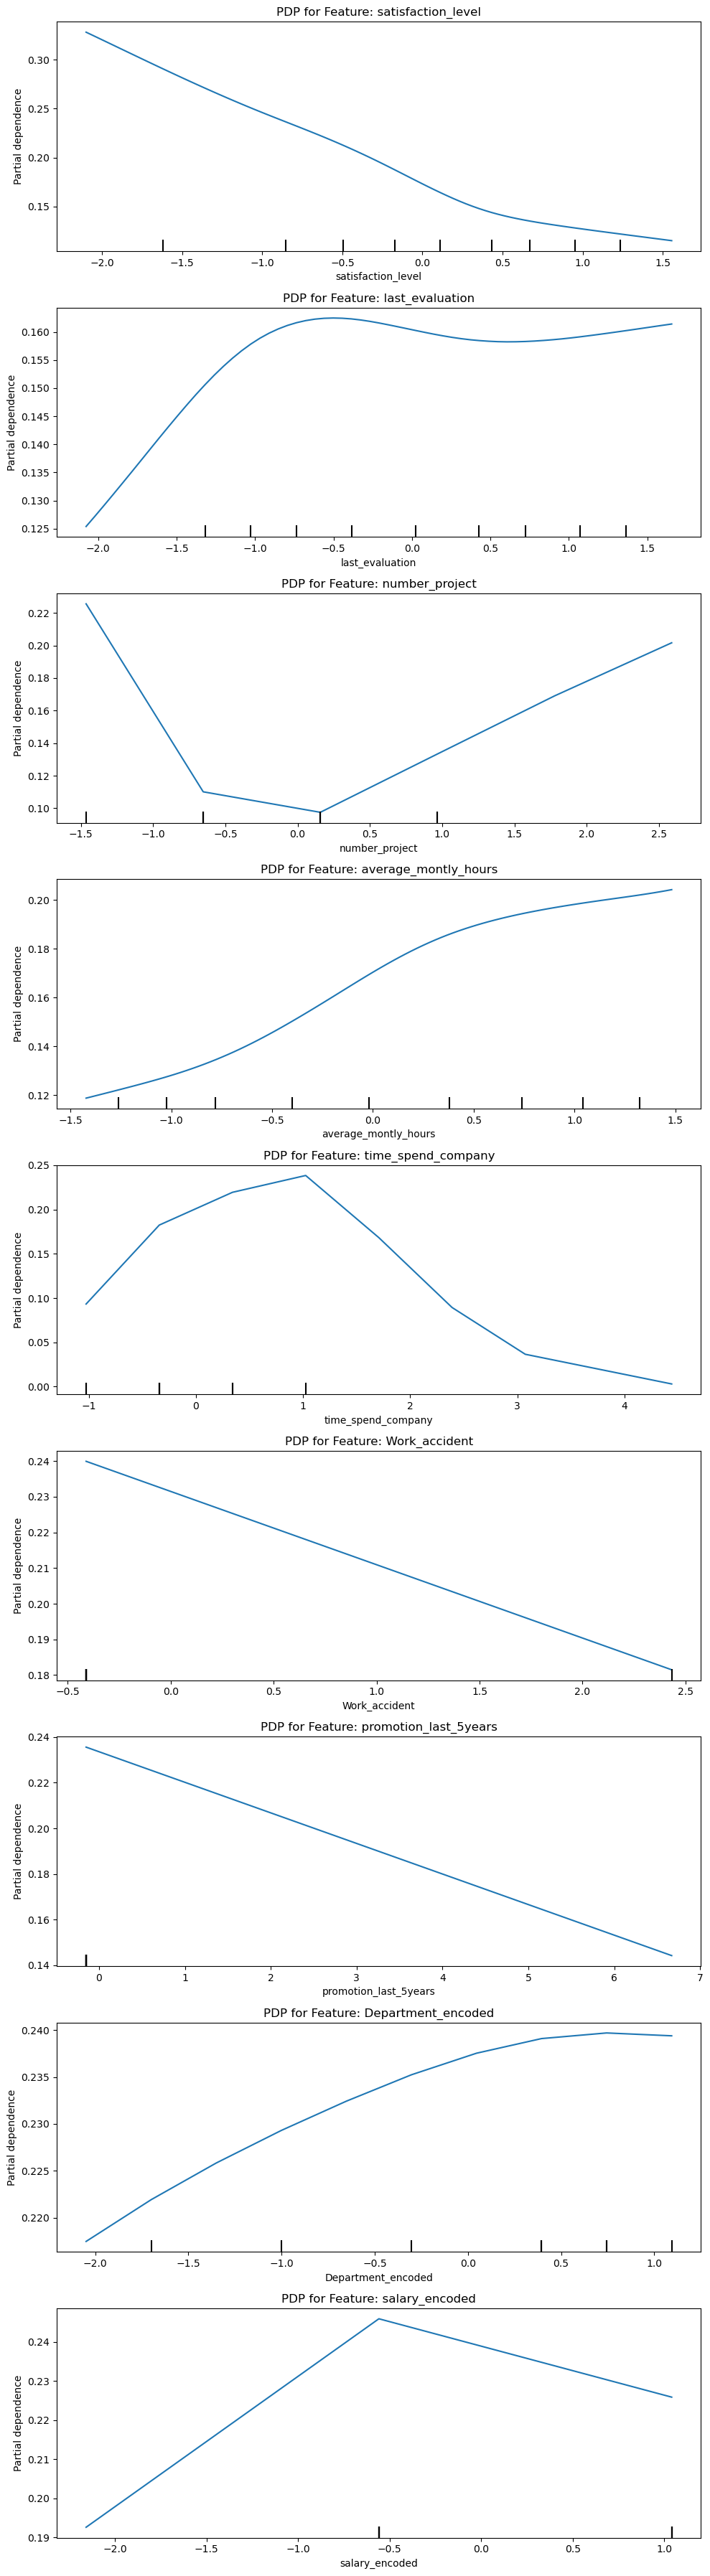

In [245]:
#  Network Model
best_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Custom wrapper for the model
class NNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        self.fitted_ = False  
        self.classes_ = None  
        self.n_features_in_ = None  

    def fit(self, X, y):
        self.model.fit(X, y, epochs=10, batch_size=32, verbose=0)
        self.fitted_ = True  
        self.classes_ = np.unique(y)
        self.n_features_in_ = X.shape[1]  
        return self

    def predict(self, X):
        check_is_fitted(self, "fitted_")
        predictions = self.model.predict(X)
        return (predictions > 0.5).astype(int)

    def predict_proba(self, X):
        check_is_fitted(self, "fitted_")
        probabilities = self.model.predict(X)
        return np.hstack([1 - probabilities, probabilities])

# Wrap the model
wrapped_model = NNWrapper(best_model)

# Fit the wrapped model
wrapped_model.fit(X_train_scaled, Y_train)

# Specify features and their names
feature_names = X_train.columns.tolist() 
features = [0, 1, 2, 3, 4, 5, 6, 7, 8]  

# Create PDP
fig, ax = plt.subplots(len(features), 1, figsize=(10, len(features) * 4))
for i, feature in enumerate(features):
    PartialDependenceDisplay.from_estimator(
        wrapped_model,
        X_train_scaled,
        features=[feature],
        feature_names=feature_names,
        ax=ax[i] if len(features) > 1 else ax
    )
    ax[i].set_title(f"PDP for Feature: {feature_names[feature]}")

plt.tight_layout()
plt.show()


#### Observations:
 1) Satisfaction_level: Higher satisfaction levels are generally associated with lower predictions.
 2) last_evaluation: Moderate "last_evaluation" scores seem to be associated with higher predictions.
 3) number_project: An intermediate number of projects is associated with higher predictions, while too few or too many projects might have a negative impact.
 4) average_montly_hours: Higher "average_montly_hours" are associated with higher predictions, but there might be a point of diminishing returns.
 5) time_spend_company: Employees with moderate tenure (around 1 year) are associated with higher predictions.
 6) Work_accident: Work accidents are associated with lower predictions.
 7) promotion_last_5years: Frequent promotions are associated with lower predictions.
 8) Department_encoded: Certain departments are associated with higher predictions.
 9) salary_encoded: A middle range of salaries is associated with higher predictions.